# CSCI218 Group Assignment

## Section 3: Experimental Setup & Training configuration

---
Group: FT7

Group Members:
- Yuxiang Chen
- Marcela Fioneta
- Haoran Gao
- Zhihui Liu
- Yijia Wang
- Lorenzo Sayo Yanga

---
Roles in section:
- Primary Author: Lorenzo Sayo Yanga
- Reviewer:
- Experimentation: Lorenzo Sayo Yanga
- Visualization:
- Documentation:

**Installing and importing packages**

In [1]:
# Installing the ucimlrepo package
!pip install ucimlrepo

# Importing
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For reproductibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

**Import Adult Dataset from UC Irvine Machine Learning Repository**

Adult dataset source: https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
def import_adult_dataset():
  # fetch dataset
  adult = fetch_ucirepo(name="Adult")

  # data (as pandas dataframes)
  X = adult.data.features
  y = adult.data.targets
  return X, y

# Print some basic info about the dataset
adult = fetch_ucirepo(name="Adult")

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

# Use the defined function
X, y = import_adult_dataset()

# combine to a single df, so that it's easier to do cleaning
df_combined = pd.concat([X, y], axis=1)
df_combined.head()

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Checking Dataset's missing values

In [3]:
# Check for any missing data in df
print("No. of rows:", len(df_combined))
print("\nRows with missing values")
print(df_combined.isna().sum())

No. of rows: 48842

Rows with missing values
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


Worst-case scenario is that ~4.6% of the dataset has null values.

We clean the data by dropping the rows with null values.

Should be noted that we could be introducing bias into the dataset by doing this (may need to check).

In [4]:
df_cleaned = df_combined.dropna()

# Check again after cleaning
print("AFTER CLEANING")
print("No. of rows:", len(df_cleaned))
print("\nRows with missing values")
print(df_cleaned.isna().sum())

AFTER CLEANING
No. of rows: 47621

Rows with missing values
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Split dataset to 60/20/20 (training, validation, testing)

In [5]:
def split_dataset(X, Y, toprint=1):
  """
  Split dataset into training, validation and testing sets
  :param X: dataset of images
  :param Y: labels
  :param toprint: print sizes of sets
  :return: X_train, Y_train, X_val, Y_val, X_test, Y_test
  """

  # splitting data
  # first split to 60%(train) and 40%(non-training)
  X_train, X_other, Y_train, Y_other = train_test_split(
    X, Y,
    test_size = 0.4,
    random_state = RANDOM_STATE,
    stratify = Y
  )

  # second split to get 20%(validation) and 20%(testing)
  X_val, X_test, Y_val, Y_test = train_test_split(
    X_other, Y_other,
    test_size = 0.5,
    random_state = RANDOM_STATE,
    stratify = Y_other # keeps class proportions similar
  )

  # print the sizes of all the sets to verify (if toprint)
  if toprint:
    print("Original size:", len(X))
    print("Training set size:", len(X_train))
    print("Validation set size:", len(X_val))
    print("Testing set size:", len(X_test))
  return X_train, Y_train, X_val, Y_val, X_test, Y_test

Use sklearn's default implementations of the models

**Code to set up and run Logistic Regression**

**Code to set up and run Decision Tree**

**Code to set up and run Random Forest**

## Logistic Regression

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay,
    precision_recall_curve, average_precision_score
)

if "df_cleaned" in globals():
    df_src = df_cleaned.copy()
elif "df_combined" in globals():
    df_src = df_combined.dropna().copy()
else:
    raise RuntimeError("Please run the dataset import + cleaning cells above.")

label_col = "income" if "income" in df_src.columns else df_src.columns[-1]
X_all = df_src.drop(columns=[label_col])
y_raw = df_src[label_col].astype(str).str.strip().str.replace(".", "", regex=False)

y_all = (y_raw == ">50K").astype(int)

X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(X_all, y_all, toprint=0)

cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X_train.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=2000, random_state=RANDOM_STATE))
])

clf.fit(X_train, y_train)

def evaluate(split_name, X, y):
    proba = clf.predict_proba(X)[:, 1]
    pred = (proba >= 0.5).astype(int)
    return {
        "split": split_name,
        "accuracy": accuracy_score(y, pred),
        "precision": precision_score(y, pred, zero_division=0),
        "recall": recall_score(y, pred, zero_division=0),
        "f1": f1_score(y, pred, zero_division=0),
        "roc_auc": roc_auc_score(y, proba),
        "avg_precision": average_precision_score(y, proba),
    }, pred, proba

val_metrics, y_val_pred, y_val_proba = evaluate("validation", X_val, y_val)
test_metrics, y_test_pred, y_test_proba = evaluate("test", X_test, y_test)

metrics_df = pd.DataFrame([val_metrics, test_metrics])
metrics_df


,split,accuracy,precision,recall,f1,roc_auc,avg_precision
0,validation,0.853213,0.742279,0.603986,0.666030,0.907190,0.769214
1,test,0.851759,0.737931,0.602425,0.663329,0.905639,0.765200


## Visual analysis

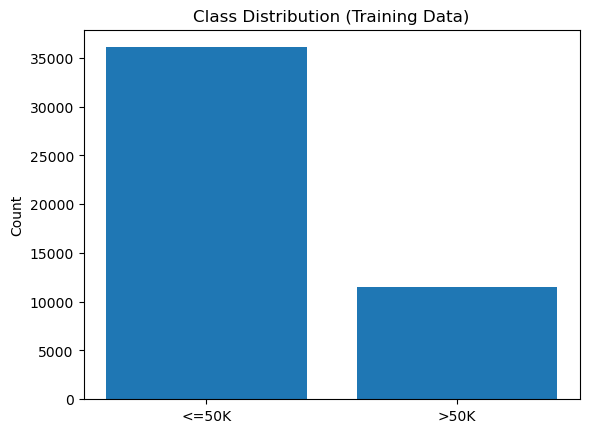

In [7]:
counts = pd.Series(y_all).value_counts().sort_index()
plt.figure()
plt.bar(["<=50K", ">50K"], counts.values)
plt.title("Class Distribution (Training Data)")
plt.ylabel("Count")
plt.show()

Confusion matrix (Test)

<Figure size 640x480 with 0 Axes>

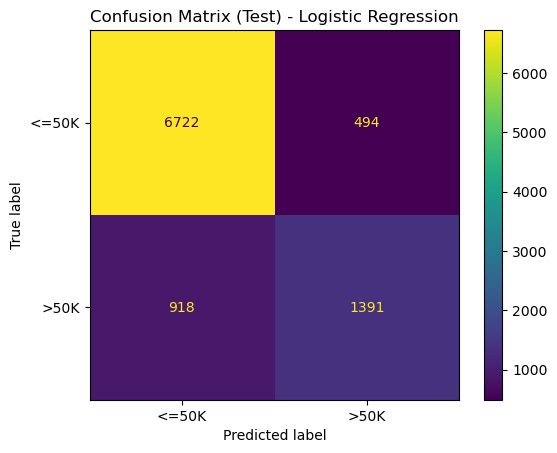

In [8]:
plt.figure()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred, display_labels=["<=50K", ">50K"], values_format="d"
)
plt.title("Confusion Matrix (Test) - Logistic Regression")
plt.show()

ROC curve (Test)

<Figure size 640x480 with 0 Axes>

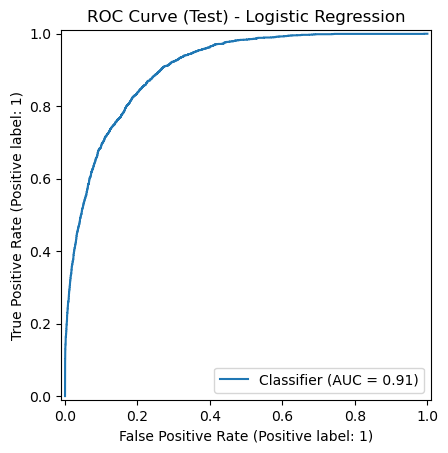

In [9]:
plt.figure()
RocCurveDisplay.from_predictions(y_test, y_test_proba)
plt.title("ROC Curve (Test) - Logistic Regression")
plt.show()